In [152]:
from operator import xor
from os import O_TRUNC
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image



from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from statistics import mean



df = pd.read_csv('games.csv')
df


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48839,223850,3DMark,2010-12-07,True,False,False,Very Positive,93,11573,34.99,34.99,0.0,False
48840,1268750,Starship Troopers: Extermination,2023-05-17,True,False,False,Very Positive,93,10330,24.99,24.99,0.0,True
48841,2005010,Warhammer 40000: Boltgun,2023-05-23,True,False,False,Overwhelmingly Positive,95,2660,19.79,21.99,10.0,True
48842,1304930,The Outlast Trials,2023-05-18,True,False,False,Very Positive,94,11155,29.99,29.99,0.0,True


## STEAM

Steam es una plataforma en línea donde uno puede comprar, descargar y jugar videojuegos en su computadora. Es  una tienda virtual donde existe  una gran variedad de juegos de diferentes géneros y de diversos desarrolladores. También ofrece características adicionales como actualizaciones automáticas, logros, chat con otros jugadores y soporte para mods.


Este dataset cuenta con mas de 48844 si nos guiamos por el numero de filas y 13 columnas que permiten obtener ciertas caracteristicas sobre cada juego publicado en la tienda. Este data set no es el mas completo en ese sentido (sobre las caracteristicas) ya que no nos indica por ejemplo si el juego esta en ingles , el nombre de la desarroladora o si es para mayores de 18 años  a diferencia de otros dataset que tenian esas columnas y algunas mas de relleno.
aun asi en comparacion con otros df existentes sobre steam este va mucho mas al grano. 

Empecemos describiendo que representa cada columna de este dataset.

app_id : identificador unico de cada juego. Como dato de curiosidad cada url del juego utiliza este identificar para poder localizar la pagina de tienda de ese juego en particular. Como ejemplo tenemos al ultimo juego que se nos muestra en el df de arriba osea el Star wars jedi Survivor



In [153]:
df.tail(1)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
48843,1774580,STAR WARS Jedi: Survivor™,2023-04-27,True,False,False,Mixed,61,26593,69.99,69.99,0.0,True


https://store.steampowered.com/app/1774580

Despues tenemos al  title

title : Representa al nombre o titulo que tiene un juego en particular <br><br>
date_release : Es la fecha de lanzamiento que tuvo un juego <br><br>
win,mac,linux : son booleanos y lo que indica es si ese juego esta disponible o no para un sistema operativo. Esto generalmente
aumenta el costo de desarrollo por lo que quizas tambien aumente el precio de un juego. <br><br>

Rating : Son las reseñas generales en Steam se clasifican en diferentes categorías para reflejar la opinión de los usuarios sobre un juego en particular. Estas categorías son:





In [154]:
valoresExistentesEnRating = df['rating'].unique()
valoresExistentesEnRating

array(['Very Positive', 'Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Negative', 'Mostly Negative',
       'Overwhelmingly Negative', 'Very Negative'], dtype=object)

- 'Very Positive' (Muy positivas): Indica que la mayoría de las reseñas son extremadamente positivas y los usuarios recomiendan ampliamente el juego.

- 'Positive' (Positivas): Significa que la mayoría de las reseñas son positivas y los jugadores recomiendan el juego en general.

- 'Mixed' (Mixtas): Indica que las opiniones sobre el juego están divididas en positivas y negativas en proporciones similares.

- 'Mostly Positive' (Mayormente positivas): Indica que la mayoría de las reseñas son positivas, pero hay una pequeña proporción de opiniones negativas.

- 'Overwhelmingly Positive' (Abrumadoramente positivas): Significa que prácticamente todas las reseñas son extremadamente positivas, y el juego es muy elogiado por los usuarios.

- 'Negative' (Negativas): Indica que la mayoría de las reseñas son negativas y los jugadores no recomiendan el juego en general.

- 'Mostly Negative' (Mayormente negativas): Indica que la mayoría de las reseñas son negativas, pero hay una pequeña proporción de opiniones positivas.

- 'Overwhelmingly Negative' (Abrumadoramente negativas): Significa que prácticamente todas las reseñas son extremadamente negativas, y el juego es fuertemente criticado por los usuarios.

- 'Very Negative' (Muy negativas): Indica que la mayoría de las reseñas son muy negativas, y los jugadores desaconsejan ampliamente el juego. <br><br>



positive_ratio :" parece representar la proporción de calificaciones positivas para cada juego <br>

In [155]:
df.head(1)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True


La columna "positive_ratio" tiene un valor de 92. Esto significa que el juego "Call of Duty: World at War" tiene una proporción de calificaciones positivas del 92%, lo cual indica que la mayoría de las calificaciones para este juego son positivas.

La columna "positive_ratio" puede ser útil para evaluar la recepción de un juego en función de las calificaciones de los usuarios. Puedes utilizar esta información como una característica en un modelo de Machine Learning para predecir el éxito o el rendimiento de un juego.



price_final: Es el precio final o actual que tiene un determinado juego ( o por lo menos hasta el momento que se creo este dataset)<br>

price_original: es el precio original de lanzamiento. En algunos casos un juego puede haber disminuido el precio_actual con respecto al precio_original con el pasar del tiempo osea los juegos con mas antiguedad tienden a disminuir sus precios hasta cierto punto. Tambien pueden haber juegos relativamente nuevos que estan en oferta y por eso el precio es un poco mas bajo con respecto al precio de lanzamiento
<br>


discount : Si el precio actual es menor al lanzamiento esta columna nos dice la diferencia entre el precio original y el actual.

steam_deck: Steam deck es una consola portatil con un sistema operativo linux que tiene la capacidad de correr la mayoria de los juegos lanzado por valve , la dueña de steam. Este campo lo que dice es si un juego es o no compatible con el steam deck

Veamos por ultimo que tipo de  datos guarda cada columna solo para estar seguros

In [156]:
df.dtypes

app_id              int64
title              object
date_release       object
win                  bool
mac                  bool
linux                bool
rating             object
positive_ratio      int64
user_reviews        int64
price_final       float64
price_original    float64
discount          float64
steam_deck           bool
dtype: object

Una buena noticia es que los tipos de datos en cada columna estan bien definido. Por ejemplo podemos ver que el Date_release no es un string sino que pandas lo toma como object ,que podria ser de tipo date. Aunque es curiosoel caso de  title que podria ser tranquilamente un string... Sobre el resto de las columna no hay mas nada que decir, los tipos esta muy bien definidos

# Limpieza de datos

In [157]:
df.isnull().any()

app_id            False
title             False
date_release      False
win               False
mac               False
linux             False
rating            False
positive_ratio    False
user_reviews      False
price_final       False
price_original    False
discount          False
steam_deck        False
dtype: bool

Como podemos ver ninguna columna tiene datos nulos en el dataset. Eso es bueno aunque esos nulos podrian estar camuflados en valores numericos igual a 0 no? Igualmente en algunos campos esos 0 pueden ser validos. Veamos que columnas tienen ceros en alguna fila

In [158]:
columnas_con_cero = []


for columna in df.columns:
    if 0 in df[columna].values:
        columnas_con_cero.append(columna)

print(columnas_con_cero)

['win', 'mac', 'linux', 'positive_ratio', 'price_final', 'price_original', 'discount', 'steam_deck']


Es raro que 'win', 'mac', 'linux', 'positive_ratio' 'steam_deck' tengan 0 en sus columnas sobre todo 'win', 'mac', 'linux' y 'steam_deck' que almacena booleanos en sus columnas y no numeros...

In [159]:
filas_win_con_ceros = df.loc[df['win'] == 0]
filas_win_con_ceros.head(3)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
34,458790,The House in Fata Morgana Original Soundtrack,2016-05-13,False,False,False,Positive,100,32,11.99,11.99,0.0,True
123,610070,Rain World - Soundtrack,2017-03-27,False,False,False,Positive,80,30,9.99,9.99,0.0,True
198,453400,Squad - Original Soundtrack Vol. 1 & 2,2016-04-29,False,False,False,Very Positive,93,97,6.99,6.99,0.0,True


Ok entonces los booleanos en  pandas se interpretan automáticamente como valores numéricos 0 y 1 para True y false respectivamente.  Aun asi nos queda el tema de positive_Ratio. Veamos aquellos que sean igual a 0

In [160]:
filas_positive_ratio_con_ceros = df.loc[df['positive_ratio'] == 0]
filas_positive_ratio_con_ceros

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
22530,581740,HUNGER,2017-06-21,True,False,False,Negative,0,11,1.24,4.99,75.0,True
22750,978610,★Fallalypse ★ Disconnect ❄,2019-05-24,True,True,True,Negative,0,10,99.99,99.99,0.0,True
23058,1717658,Train Simulator: CSX SD45-2 Loco Add-On,2021-12-09,True,False,False,Negative,0,10,19.99,19.99,0.0,True
23721,267220,Line Of Defense Tactics - Tactical Advantage,2014-03-17,True,False,False,Negative,0,10,9.99,9.99,0.0,True
25694,515170,Iron Sea - The West Coast,2016-09-23,True,False,False,Negative,0,11,2.99,2.99,0.0,True
26095,1173340,War Trains,2019-10-22,True,True,True,Negative,0,11,99.99,99.99,0.0,True
29088,984080,Christmas Carol,2018-11-19,True,False,False,Negative,0,13,9.99,9.99,0.0,True
31595,1915410,Arachnophobia,2022-04-26,True,False,False,Negative,0,14,2.99,2.99,0.0,True
34508,2228220,Variant 22,2023-02-03,True,False,False,Negative,0,10,13.99,13.99,0.0,True
36337,501060,C.S.S. CITADEL VR,2016-07-15,True,False,False,Negative,0,10,7.99,7.99,0.0,True


Bueno con esto nos sacamos las dudas. Cuando el positive_Ratio es igual a 0 quiere decir que un juego no ha tenido absolutamente ninguna calificacion positiva. De hecho esto lo podemos comprobar con el primer juego que se muestra en la lista 

In [161]:
filas_positive_ratio_con_ceros.head(1)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
22530,581740,HUNGER,2017-06-21,True,False,False,Negative,0,11,1.24,4.99,75.0,True


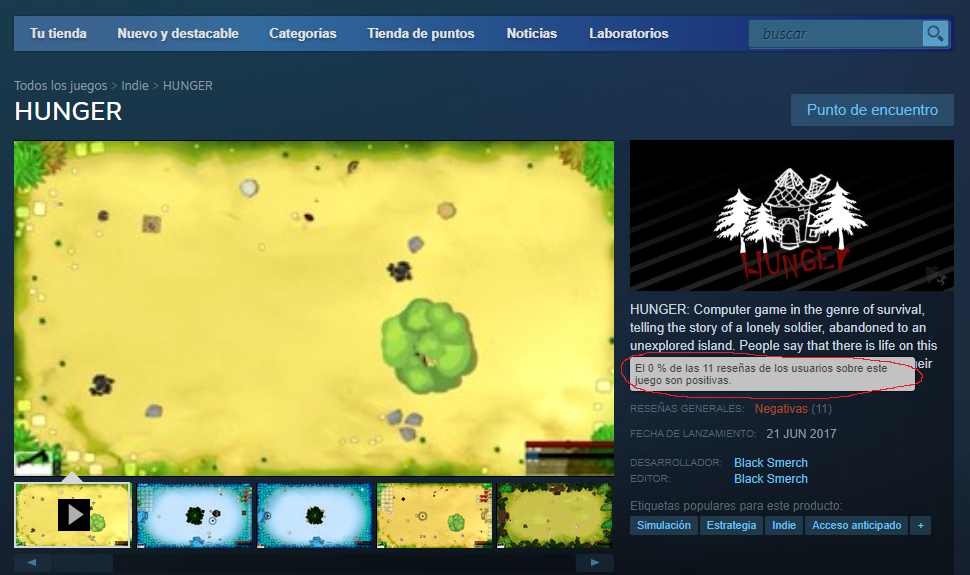

In [162]:

Image('./imagenes/a.png')

Vemos como ademas user_reviews coincide con la cantidad de reseñas generales. Lo que nos habla muy bien del dataset. Hasta con los juegos mas  desconocidos acierta con los datos que brinda

Antes de continuar con el analisis ,veamos cual es la antiguedad de este dataset. Para eso podemos averiguarlo obteniendo el ultimo juego lanzado segun este dataset

In [163]:
df_ordenado_por_fechas_descendentemente = df.sort_values('date_release', ascending=False)
df_ordenado_por_fechas_descendentemente

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
48834,1065400,Tank Mechanic Simulator - Shermans DLC,2023-06-06,True,True,False,Positive,81,11,7.19,7.99,10.0,True
48836,2094910,Pile Up!,2023-06-02,True,False,False,Very Positive,82,152,9.99,9.99,0.0,True
48838,1959350,Homebody,2023-06-01,True,False,False,Very Positive,98,73,19.99,19.99,0.0,True
48833,1426010,STASIS: BONE TOTEM,2023-05-31,True,False,False,Very Positive,95,185,19.99,19.99,0.0,True
48832,1672310,Decarnation,2023-05-31,True,False,False,Very Positive,89,182,14.99,14.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35837,224920,Legacy of Kain: Soul Reaver,1999-09-08,True,False,False,Mostly Positive,73,1467,0.00,0.00,0.0,True
9368,20,Team Fortress Classic,1999-04-01,True,True,True,Very Positive,85,5146,4.99,4.99,0.0,True
10018,70,Half-Life,1998-11-08,True,True,True,Overwhelmingly Positive,96,68327,9.99,9.99,0.0,True
32579,232770,POSTAL,1997-11-14,True,True,True,Very Positive,85,2329,0.00,0.00,0.0,True


Es muy interesante ver que el juego mas recientemente lanzado fue el 2023-06-06 por lo que podemos decir que este dataset es muy vigente. Ademas tambien de pasada vemos los mas antiguos como el mitico Half life lanzado en 1998.

In [164]:
df_half_life  = df.loc[df['app_id'] == 70]
df_half_life

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
10018,70,Half-Life,1998-11-08,True,True,True,Overwhelmingly Positive,96,68327,9.99,9.99,0.0,True


En el dataset de abajo podemos ver el primer juego lanzado en steam que es el counter strike ya que cuenta con el id mas chico que existe. Cabe destacar que antes de steam estos juegos ya eran comercializados en tiendas en un formato fisico (cd-dvd)

In [165]:
df_ordenado_appid = df.sort_values('app_id',ascending=True)
df_ordenado_appid

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
11446,10,Counter-Strike,2000-11-01,True,True,True,Overwhelmingly Positive,97,132250,9.99,9.99,0.0,True
9368,20,Team Fortress Classic,1999-04-01,True,True,True,Very Positive,85,5146,4.99,4.99,0.0,True
21146,30,Day of Defeat,2003-05-01,True,True,True,Very Positive,87,3489,4.99,4.99,0.0,True
9369,40,Deathmatch Classic,2001-06-01,True,True,True,Mostly Positive,79,1757,4.99,4.99,0.0,True
11218,50,Half-Life: Opposing Force,1999-11-01,True,True,True,Overwhelmingly Positive,95,14057,4.99,4.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46655,2386820,Boundary - Founder Cosmetic Pack Founders Pack,2023-04-13,True,False,False,Very Positive,96,63,0.00,0.00,0.0,True
48814,2387940,Call of Duty®: Modern Warfare® II - Demon Deer...,2023-05-19,True,False,False,Mixed,43,143,19.99,19.99,0.0,True
48482,2399900,DCS: Normandy 2.0 Upgrade,2023-04-21,True,False,False,Positive,80,10,0.00,0.00,0.0,True
48797,2404860,SMITE x VShojo Deluxe Bundle,2023-05-16,True,False,False,Positive,100,13,34.99,34.99,0.0,True


Bueno volviendo al tema de las fechas, hay que hacer algo con estos datos. Asi que en primer lugar , obtengamos el juego que mas recientemente fue lanzado segun este dataset

In [166]:

ultimo_juego_lanzado = df_ordenado_por_fechas_descendentemente.head(1)

Obtenemos su date_relase

In [167]:
ultimo_juego_lanzado['date_release']

48834    2023-06-06
Name: date_release, dtype: object

In [168]:
from datetime import datetime

fecha_del_ultimo_lanzamiento = datetime(2023, 6, 6).date()


El objetivo es convertir a todas las fechas de lanzamiento en dias transcurrido desde su lanzamiento hasta la fecha (2023,6,6)

In [169]:
df['date_release'] = pd.to_datetime(df['date_release']) ## no deberia ser necesario pero por si acaso...
df.head(3)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True


In [170]:
df['date_release'] = (fecha_del_ultimo_lanzamiento - df['date_release'].dt.date).dt.days
df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,5313,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True
1,13500,Prince of Persia: Warrior Within™,5310,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,22364,BRINK: Agents of Change,4325,True,False,False,Positive,85,21,2.99,2.99,0.0,True
3,113020,Monaco: What's Yours Is Mine,3695,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,226560,Escape Dead Island,3122,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48839,223850,3DMark,4564,True,False,False,Very Positive,93,11573,34.99,34.99,0.0,False
48840,1268750,Starship Troopers: Extermination,20,True,False,False,Very Positive,93,10330,24.99,24.99,0.0,True
48841,2005010,Warhammer 40000: Boltgun,14,True,False,False,Overwhelmingly Positive,95,2660,19.79,21.99,10.0,True
48842,1304930,The Outlast Trials,19,True,False,False,Very Positive,94,11155,29.99,29.99,0.0,True


Podemos observar que hay una diferencia de 40 dias desde su lanzamiento a la fecha 2023/6/6 para el juego  STAR WARS Jedi: Survivor™ . Y Tambien podemos visualizar esos datos con el resto de los juegos.

El siguiente paso es convertir las columnas booleanas en numericas. Primero obtengamos explicitamente las columnas booleanas

In [171]:
columnas_booleanas = df.select_dtypes(include=bool).columns
columnas_booleanas


Index(['win', 'mac', 'linux', 'steam_deck'], dtype='object')

Realizamos la conversion

In [172]:
for columna in columnas_booleanas:
    df[columna] = df[columna].astype(int)

df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,5313,1,0,0,Very Positive,92,37039,19.99,19.99,0.0,1
1,13500,Prince of Persia: Warrior Within™,5310,1,0,0,Very Positive,84,2199,9.99,9.99,0.0,1
2,22364,BRINK: Agents of Change,4325,1,0,0,Positive,85,21,2.99,2.99,0.0,1
3,113020,Monaco: What's Yours Is Mine,3695,1,1,1,Very Positive,92,3722,14.99,14.99,0.0,1
4,226560,Escape Dead Island,3122,1,0,0,Mixed,61,873,14.99,14.99,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48839,223850,3DMark,4564,1,0,0,Very Positive,93,11573,34.99,34.99,0.0,0
48840,1268750,Starship Troopers: Extermination,20,1,0,0,Very Positive,93,10330,24.99,24.99,0.0,1
48841,2005010,Warhammer 40000: Boltgun,14,1,0,0,Overwhelmingly Positive,95,2660,19.79,21.99,10.0,1
48842,1304930,The Outlast Trials,19,1,0,0,Very Positive,94,11155,29.99,29.99,0.0,1


Listo ya tenemos los datos booleanos transformados en numericos. Ahora obtengamos todas las columnas numericas

In [173]:
columnas_numericas = df.select_dtypes(include=[int, float]).columns
columnas_numericas

Index(['app_id', 'date_release', 'win', 'mac', 'linux', 'positive_ratio',
       'user_reviews', 'price_final', 'price_original', 'discount',
       'steam_deck'],
      dtype='object')

In [174]:
columnas_numericas = ['app_id', 'date_release', 'win', 'mac', 'linux', 'positive_ratio',
       'user_reviews', 'price_final', 'price_original', 'discount',
       'steam_deck']

# Outliers

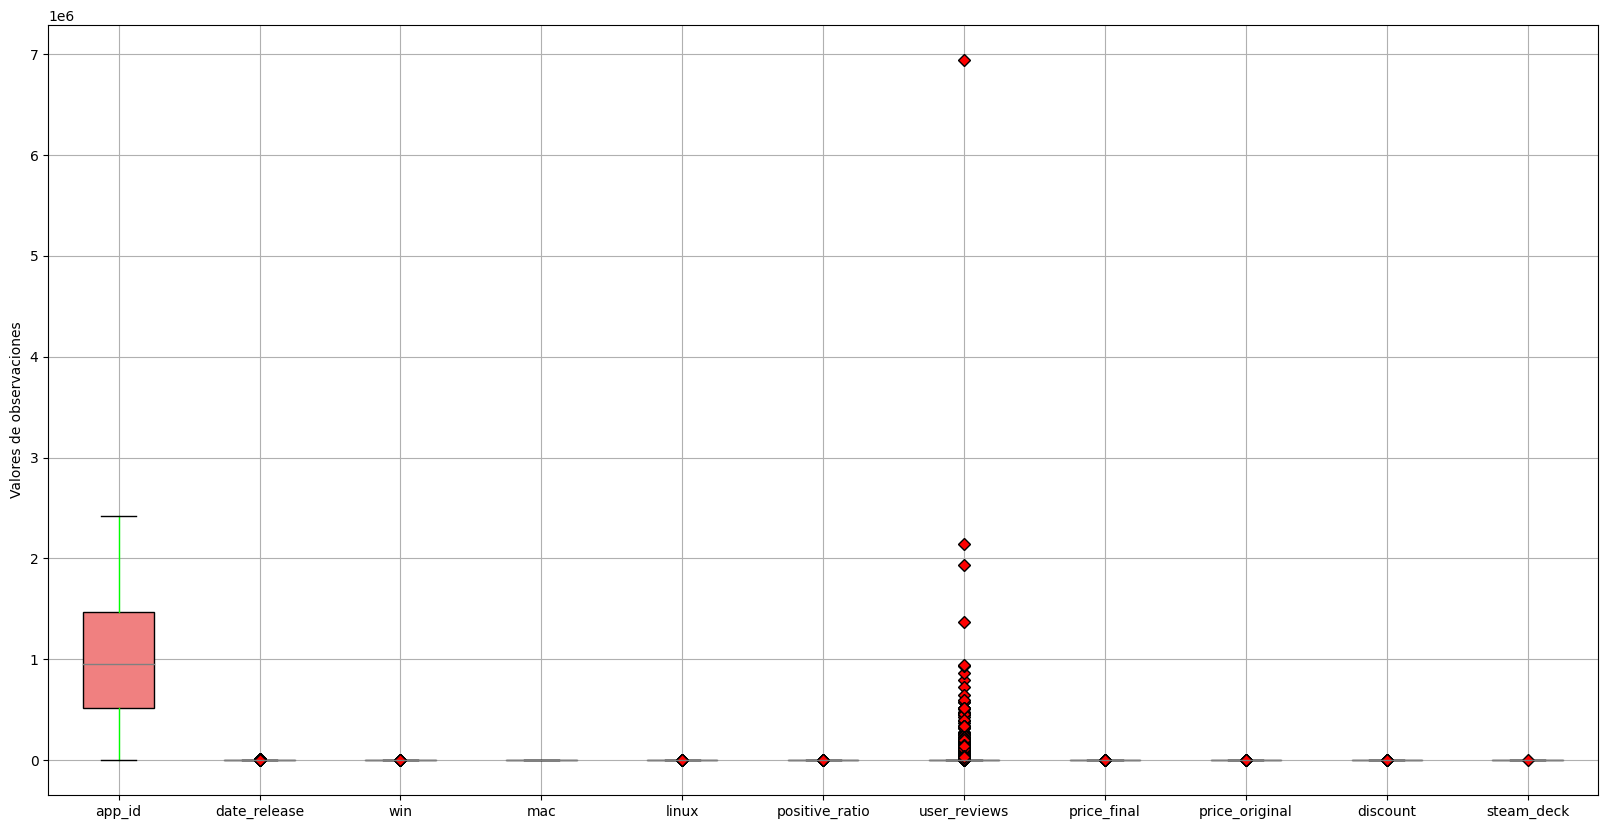

In [175]:
dataframe = df.loc[:, columnas_numericas]
# Primer acercamiento a la detección de outliers mediante boxplot utilizando todas las columnas numéricas...
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
labels = columnas_numericas
red_diamond = dict(markerfacecolor='r', marker='D')
bplot = ax1.boxplot(dataframe.select_dtypes(include=["int16", "int32", "int64", "float16", "float32", "float64"]),
                    vert=True,
                    patch_artist=True,
                    labels=labels,
                    capprops=dict(color="black"),
                    medianprops=dict(color="grey"),
                    whiskerprops=dict(color="lime"),
                    flierprops=red_diamond)
colors = ['lightcoral', 'mediumpurple', 'gold','aquamarine']
for patch, color in zip(bplot['boxes'], colors):
 patch.set_facecolor(color)
for ax in [ax1]:
 ax.yaxis.grid(True)
 ax.xaxis.grid(True)
 ax.set_ylabel('Valores de observaciones')
plt.show() 

Antes que nada y solo por si acaso ,los rombos aqui representan los valores atipicos en cada columna <br>
Al parecer la unica columna que cuenta con valores atipicos  en algunas de sus filas es user_reviews y tiene muchisimo sentido. Aun asi sigue siendo solo un analisis visual, es posible que a estas escalas nos resulte imposible ver si los rombos en date_release por ejemeplo son o no outliers.

In [176]:
# Puntuación Z = (punto_datos - media) / desviación estándar
# ayuda a comprender qué tan lejos está el punto de datos de la media. Y después de configurar un valor 
# de umbral, se pueden utilizar los valores de puntuación z de los puntos de datos para definir los valores atíp


def puntuacionZdeUnaVariableInd(variable):
    z = np.abs(stats.zscore(df[variable]))
    return z

z_user_reviews = puntuacionZdeUnaVariableInd('user_reviews')
z_user_reviews


0        0.929536
1        0.011786
2        0.045587
3        0.051904
4        0.023144
           ...   
48839    0.258714
48840    0.225971
48841    0.023929
48842    0.247703
48843    0.654369
Name: user_reviews, Length: 48844, dtype: float64

In [177]:
# para definir un valor de umbral atípico, se elige que generalmente es 3.0. 
def cantidadDeValoresAtipicosEnLaColumna(z) :
    threshold = 3 
    a = np.where(z > threshold)
    cantidad_elementos = len(a[0])
    return cantidad_elementos


print("Cantidad de valores atipicos en la columna  user_reviews", cantidadDeValoresAtipicosEnLaColumna(z_user_reviews))

Cantidad de valores atipicos en la columna  user_reviews 101


In [179]:
cantidadDeOutliders=0
resultados = []

for element in columnas_numericas:
    z = puntuacionZdeUnaVariableInd(element)
    cantidadDeValoresAtipicos = cantidadDeValoresAtipicosEnLaColumna(z)
    cantidadDeOutliders += cantidadDeValoresAtipicos
    resultados.append({'Variable': element, 'Cantidad de Valores Atípicos': cantidadDeValoresAtipicos})

df_resultados = pd.DataFrame(resultados)
df_resultados



,Variable,Cantidad de Valores Atípicos
0,app_id,0
1,date_release,606
2,win,751
3,mac,0
4,linux,0
5,positive_ratio,513
6,user_reviews,101
7,price_final,749
8,price_original,841
9,discount,2311


Analicemos un poco los resultados obtenidos . Para app_id no hay outliers,  tampoco par mac y linux. Sin embargo si para windows y eso es rarisimo por aun asi podria llegar a ser valido . Existe la posibilidad de que se lancen juegos y que estos no sean compatibles con windows. Comprobemoslo

In [186]:
juegos_windows_no_soportados = df.loc[df['win'] == 0]
print("cantidad juegos que no soportan windows :",juegos_windows_no_soportados.shape[0])
juegos_windows_soportados = df.loc[df['win'] == 1]
print("cantidad juegos que si soportan windows :",juegos_windows_soportados.shape[0])



cantidad juegos que no soportan windows : 751
cantidad juegos que si soportan windows : 48093


Vemos que se cumple con lo que dije previamente, 751 juegos no son compatible con windows aparentemente. Si tenemos en cuenta que el df tiene en total :

In [187]:
print("cantidad juegos de steam segun el dataset :",df.shape[0])

cantidad juegos de steam segun el dataset : 48844


Entonces

In [194]:
porcentajes_outliers_win = 751*100/df.shape[0]
print(f"en la columna win solo el %{round(porcentajes_outliers_win,2)} de los datos son outliers")

en la columna win solo el %1.54 de los datos son outliers


1.54% es una cantidad pequeña en comparacion al casi 99% restante. Aun asi sigamos analizando . Veamos todos los juegos que no son compatible con windows

In [196]:
juegos_windows_no_soportados.head(5)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
34,458790,The House in Fata Morgana Original Soundtrack,2580,0,0,0,Positive,100,32,11.99,11.99,0.0,1
123,610070,Rain World - Soundtrack,2262,0,0,0,Positive,80,30,9.99,9.99,0.0,1
198,453400,Squad - Original Soundtrack Vol. 1 & 2,2594,0,0,0,Very Positive,93,97,6.99,6.99,0.0,1
221,613230,Planescape: Torment: Enhanced Edition Official...,2247,0,0,0,Mostly Positive,70,17,9.99,9.99,0.0,1
236,1600150,Tiny Bunny: Full Soundtrack,774,0,0,0,Very Positive,98,97,3.99,3.99,0.0,1


Ahora se lo va a ordenar por cantidad de user_reviews

In [199]:
juegos_windows_no_soportados_ordenado = juegos_windows_no_soportados.sort_values('user_reviews',ascending=False)
juegos_windows_no_soportados_ordenado.head(7)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
26260,374570,Kung Fury,2931,0,0,0,Overwhelmingly Positive,98,16692,0.0,0.0,0.0,1
47842,245550,Free to Play,3366,0,0,0,Overwhelmingly Positive,95,10982,0.0,0.0,0.0,1
43110,804320,Papers Please - The Short Film,1928,0,0,0,Overwhelmingly Positive,98,9482,0.0,0.0,0.0,1
40109,633030,Oats Studios - Volume 1,2183,0,0,0,Overwhelmingly Positive,97,4337,0.0,0.0,0.0,1
23530,413850,CS:GO Player Profiles,2780,0,0,0,Very Positive,93,2298,0.0,0.0,0.0,1
38865,351570,Killing Floor: Uncovered,3029,0,0,0,Very Positive,88,2189,0.0,0.0,0.0,1
27177,354500,PAYDAY: The Web Series,3010,0,0,0,Very Positive,91,1293,0.0,0.0,0.0,1


Una observacion interesante es que ninguno de los titulos mostrados al parecer corresponde a un juego o eso pareciera si hacemos intentamos generalizar con estos 7 casos... Steam si bien es una plataforma enfocado a la venta de juegos, tambien tiene algunas series y aplicaciones de escritorios... Veamos un caso

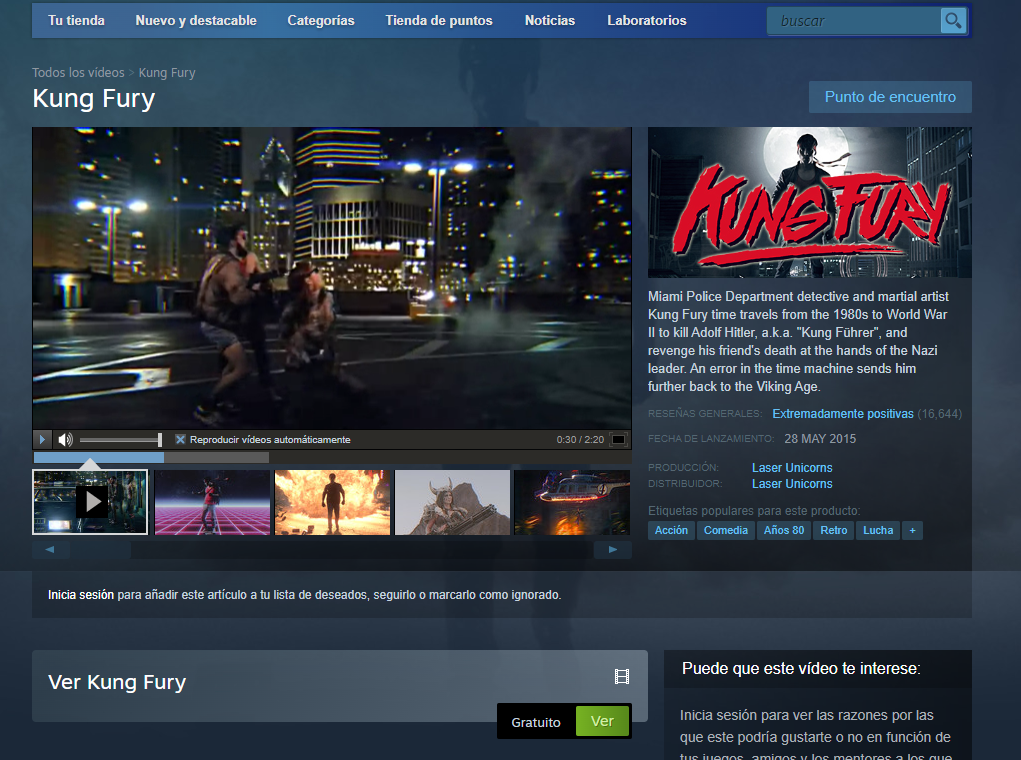

In [202]:
Image('./imagenes/kung fury.png')

Como podemos ver es una pelicula al parecer. Pero si miramos sus requisitos

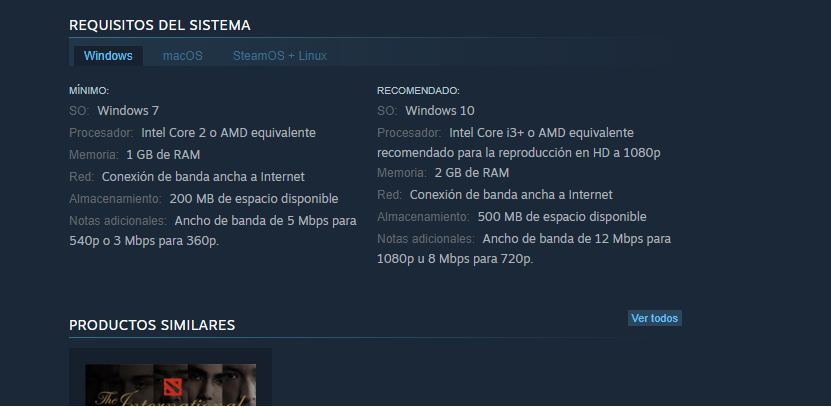

In [203]:
Image('./imagenes/requisitos.png')

Vemos que especifica que es compatible con windows 7 a 10. Y sin embargo en el data set esta especificado que no es compatible con windows

In [205]:
pelicula_kung_fury = df.loc[df['app_id'] == 374570]
pelicula_kung_fury

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
26260,374570,Kung Fury,2931,0,0,0,Overwhelmingly Positive,98,16692,0.0,0.0,0.0,1


Esto efectivamente podria ser un error de carga de datos o intepretacion del creador del dataset o podria ser un indicativo para ayudarnos a identificar aquellos productos que no son juegos!

Ahora volviendo a los requisitos , aunque nos diga que Kung fury es compatible con windows 7 y 10  en realidad deberia ser compatible con cualquier sistema operativo que sea capaz de ejecutar la aplicacion de escritorio de steam... ya que solo se trata de un video... <br> <br>
Ahora observemos la tabla de abajo

In [201]:
juegos_windows_no_soportados_ordenado.tail(7)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
44085,1298650,The Light Remake - Soundtrack,1097,0,0,0,Positive,90,10,1.99,1.99,0.0,1
6402,1724110,Seed of the Dead: Sweet Home Theme Songs,648,0,0,0,Positive,90,10,4.99,4.99,0.0,1
28618,1146260,Minoria Official Soundtrack,1379,0,0,0,Positive,90,10,6.99,6.99,0.0,1
6092,2081570,The Ascent - Cyber Heist - Soundtrack,292,0,0,0,Positive,90,10,3.99,3.99,0.0,1
28850,209771,Darwinia Soundtrack,4060,0,0,0,Positive,100,10,3.99,3.99,0.0,1
28880,1238310,Blacksad Soundtrack,1211,0,0,0,Positive,100,10,0.99,9.99,90.0,1
48742,1788600,X4: Tides of Avarice Soundtrack,467,0,0,0,Positive,90,10,9.99,9.99,0.0,1


Se trata efectivamente de soundtracks de videojuegos. Al igual que con las peliculas ,estos al ser una lista de archivos en formato mp3 o en otro formato de audio deberia ser compatible con cualquier sistema operativo que sea capaz de ejecutar la aplicacion de escritorio de steam.

In [209]:
juegos_compatibles_con_ningun_so = df.loc[(df['win'] == 0) & (df['mac'] == 0)  & (df['linux'] == 0) ]
juegos_compatibles_con_ningun_so

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
34,458790,The House in Fata Morgana Original Soundtrack,2580,0,0,0,Positive,100,32,11.99,11.99,0.0,1
123,610070,Rain World - Soundtrack,2262,0,0,0,Positive,80,30,9.99,9.99,0.0,1
198,453400,Squad - Original Soundtrack Vol. 1 & 2,2594,0,0,0,Very Positive,93,97,6.99,6.99,0.0,1
221,613230,Planescape: Torment: Enhanced Edition Official...,2247,0,0,0,Mostly Positive,70,17,9.99,9.99,0.0,1
236,1600150,Tiny Bunny: Full Soundtrack,774,0,0,0,Very Positive,98,97,3.99,3.99,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48711,1237420,HYPERCHARGE: Unboxed Original Soundtrack,1135,0,0,0,Positive,90,10,9.99,9.99,0.0,1
48718,1612740,Undying Soundtrack Preview,754,0,0,0,Positive,100,10,0.00,0.00,0.0,1
48723,1661120,Carrier Command 2 Soundtrack,312,0,0,0,Positive,93,16,29.99,29.99,0.0,1
48740,1200960,Master Of Pottery - OST,1253,0,0,0,Positive,90,10,0.00,0.00,0.0,1
